## **Task 6: House Price Prediction**

/tmp/ipython-input-1216505295.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype('category').cat.codes
/tmp/ipython-input-1216505295.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype('category').cat.codes
/tmp/ipython-input-1216505295.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

MAE: 1843.70
RMSE: 5973.53


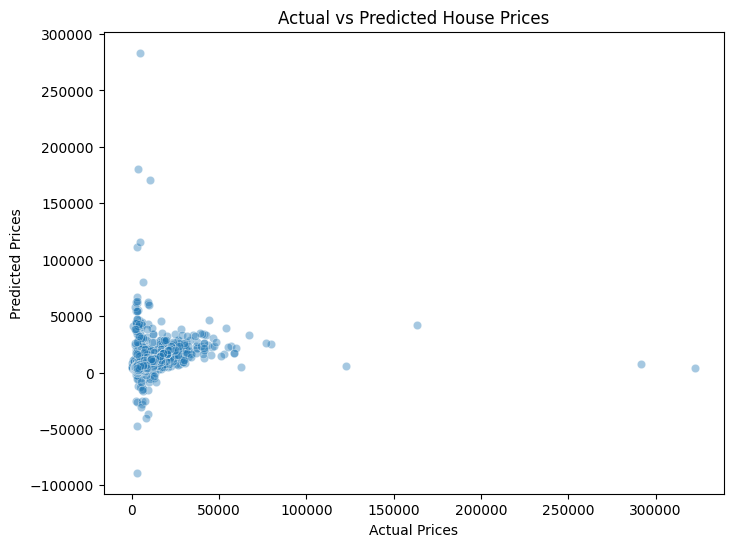

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Load Dataset
file_path = "house_prices.csv"
data = pd.read_csv(file_path, on_bad_lines='skip')

# Step 2: Drop irrelevant columns
drop_cols = ['Index', 'Title', 'Description', 'Amount(in rupees)', 'Society',
             'Dimensions', 'Plot Area', 'Super Area', 'overlooking', 'facing']
data.drop(columns=[c for c in drop_cols if c in data.columns], inplace=True)

# Remove rows where Price is missing
data = data.dropna(subset=['Price (in rupees)'])

# Clean Carpet Area
data['Carpet Area'] = data['Carpet Area'].str.replace(' sqft', '', regex=False)
data['Carpet Area'] = pd.to_numeric(data['Carpet Area'], errors='coerce')

# Clean Floor info
data['Floor'] = data['Floor'].str.extract(r'(\d+)').astype(float)

# Convert Bathroom, Balcony, Car Parking to numeric
for col in ['Bathroom', 'Balcony']:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data['Car Parking'] = data['Car Parking'].str.extract(r'(\d+)').astype(float)

# Drop rows with essential features missing
data = data.dropna(subset=['Carpet Area', 'Bathroom', 'Floor'])

# Handle categorical columns safely
for col in ['location', 'Status', 'Transaction', 'Furnishing', 'Ownership']:
    if col in data.columns:
        data[col] = data[col].astype('category').cat.codes

# Fill remaining NaNs in features with 0
data.fillna(0, inplace=True)

# Features & Target
X = data[['Carpet Area', 'Bathroom', 'Balcony', 'Car Parking', 'Floor',
          'location', 'Status', 'Transaction', 'Furnishing', 'Ownership']]
y = data['Price (in rupees)']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train Gradient Boosting Model
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Step 7: Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
